In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import operator
from numpy import argmax# Data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

# Scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, tree, datasets
from sklearn.tree import plot_tree

# Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from scipy.stats import randint

# TensorFlow / Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Conv2D, BatchNormalization, Flatten, MaxPooling1D, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# SciKeras
from scikeras.wrappers import KerasClassifier

# Other
import operator
from numpy import argmax
from math import floor
import time
from bayes_opt import BayesianOptimization

from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import datasets  

In [2]:
weather = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Climate Wins\2. Data Sets\weather_cleaned_filled.csv")
answers = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Data Analysis Course\Machine Learning\Climate Wins\2. Data Sets\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv")

In [3]:
#filter for 1990s
weather_1990s = weather[weather['DATE'].astype(str).str.contains('199')]
answers_1990s = answers[answers['DATE'].astype(str).str.contains('199')]

In [4]:
weather_1990s = weather_1990s.drop(columns=[c for c in ["DATE","MONTH"] if c in weather_1990s.columns], errors="ignore")
answers_1990s = answers_1990s.drop(columns=["DATE"], errors="ignore")

In [5]:
X = weather_1990s.to_numpy() 
y = np.array(answers_1990s)  

In [6]:
X.shape

(3652, 135)

In [7]:
y.shape

(3652, 15)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921, 15)
(731, 135) (731, 15)


In [10]:
answers_station = answers.fillna(0).astype(int)  # explicitly numeric, no NaN

In [11]:
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
y_test_flat = (y_test.mean(axis=1) >= 0.5).astype(int)  # majority vote
y_pred_flat = (clf.predict(X_test).mean(axis=1) >= 0.5).astype(int)

accuracy = accuracy_score(y_test_flat, y_pred_flat)
prec = precision_score(y_test_flat, y_pred_flat)
rec = recall_score(y_test_flat, y_pred_flat)
f1 = f1_score(y_test_flat, y_pred_flat)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

Model Accuracy: 0.9658
Precision: 0.8954
Recall: 0.9384
F1-score: 0.9164


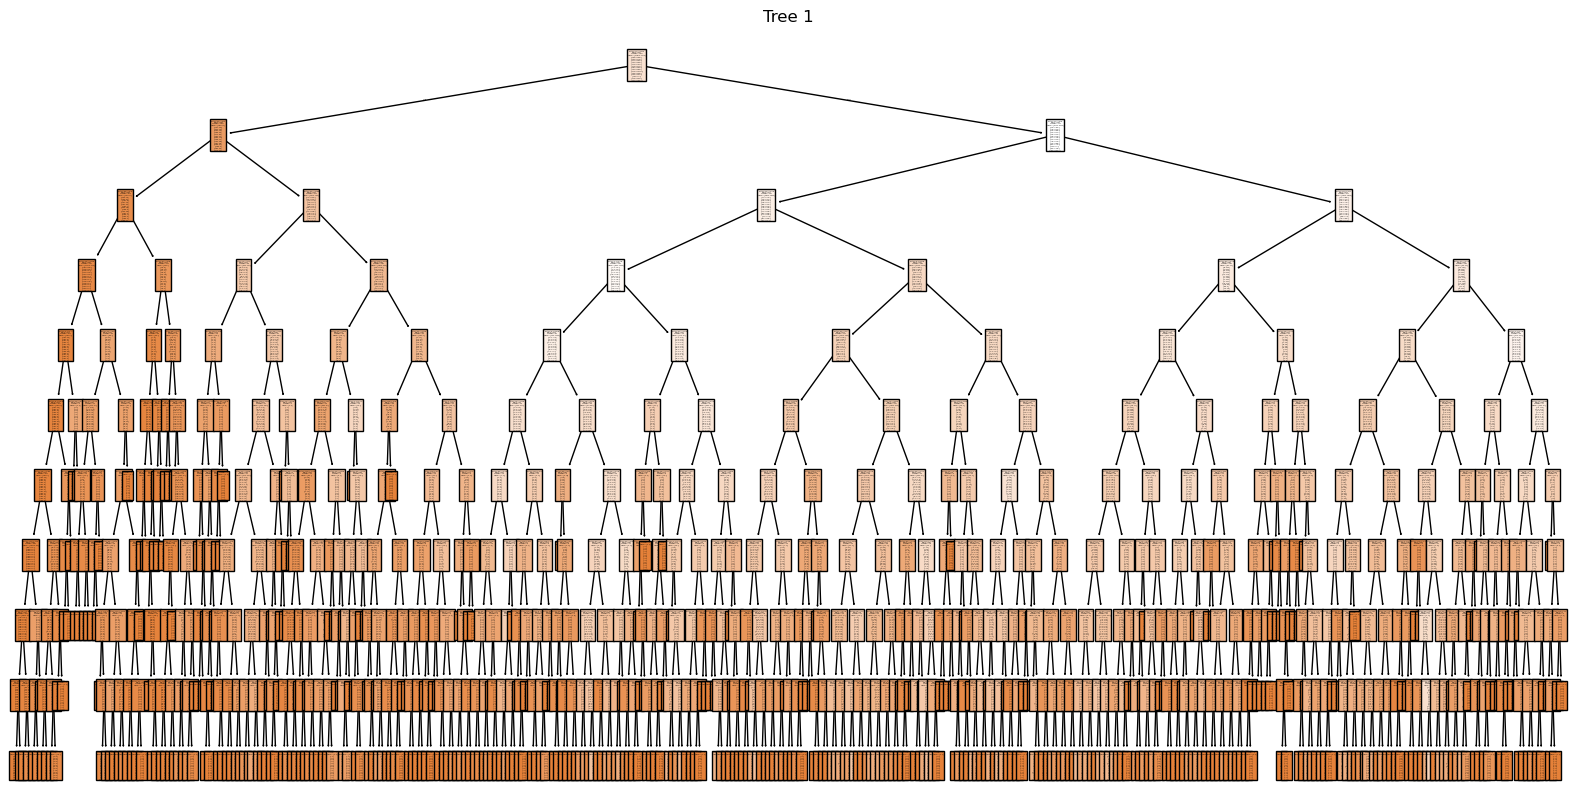

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=[f"Feature_{i}" for i in range(X.shape[1])], filled=True)
plt.title("Tree 1")
plt.show()

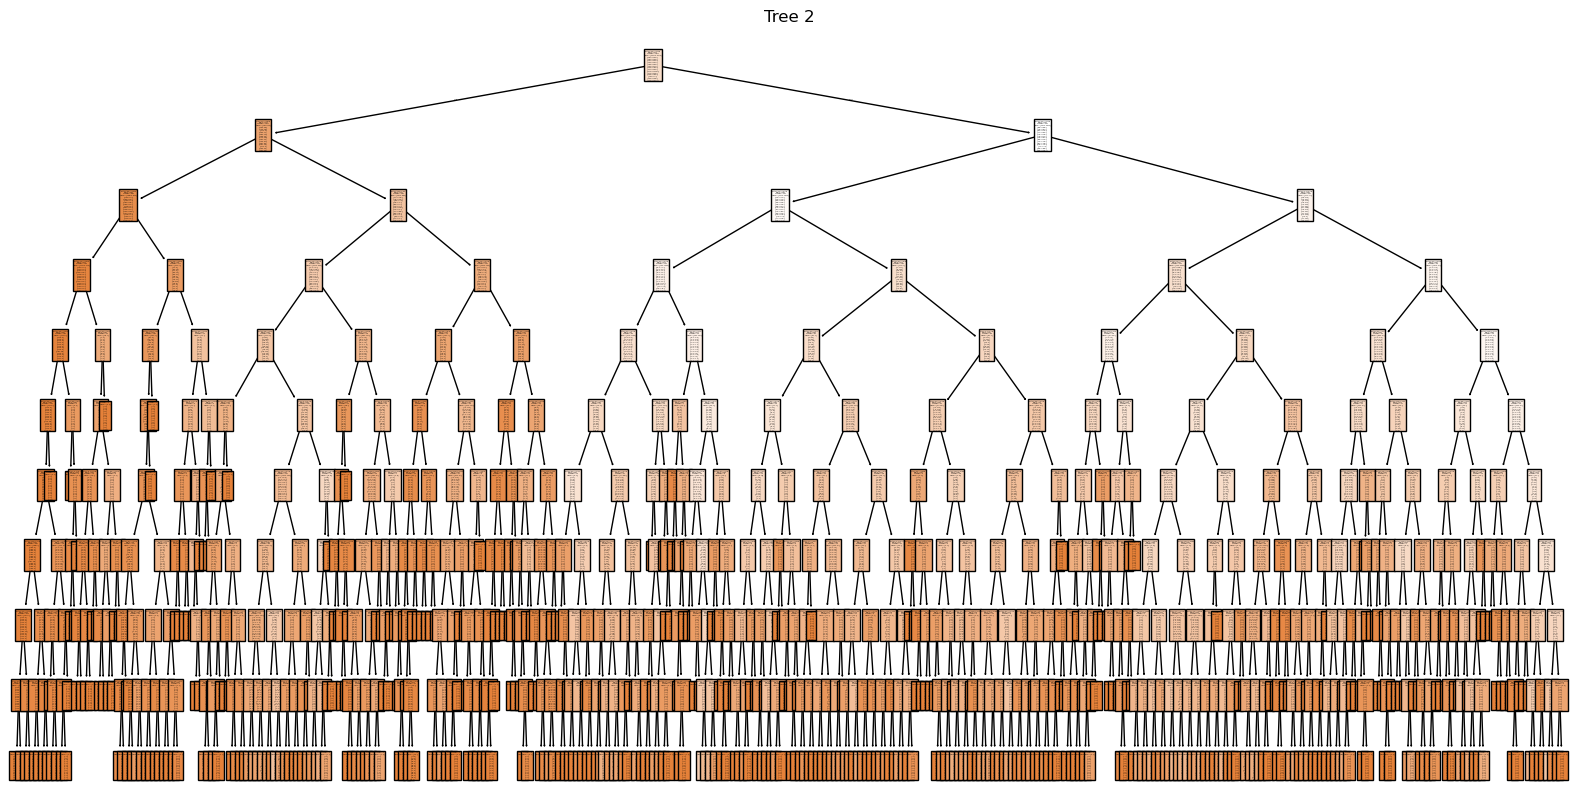

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[1],  feature_names=[f"Feature_{i}" for i in range(X.shape[1])], filled=True)
plt.title("Tree 2")
plt.show()

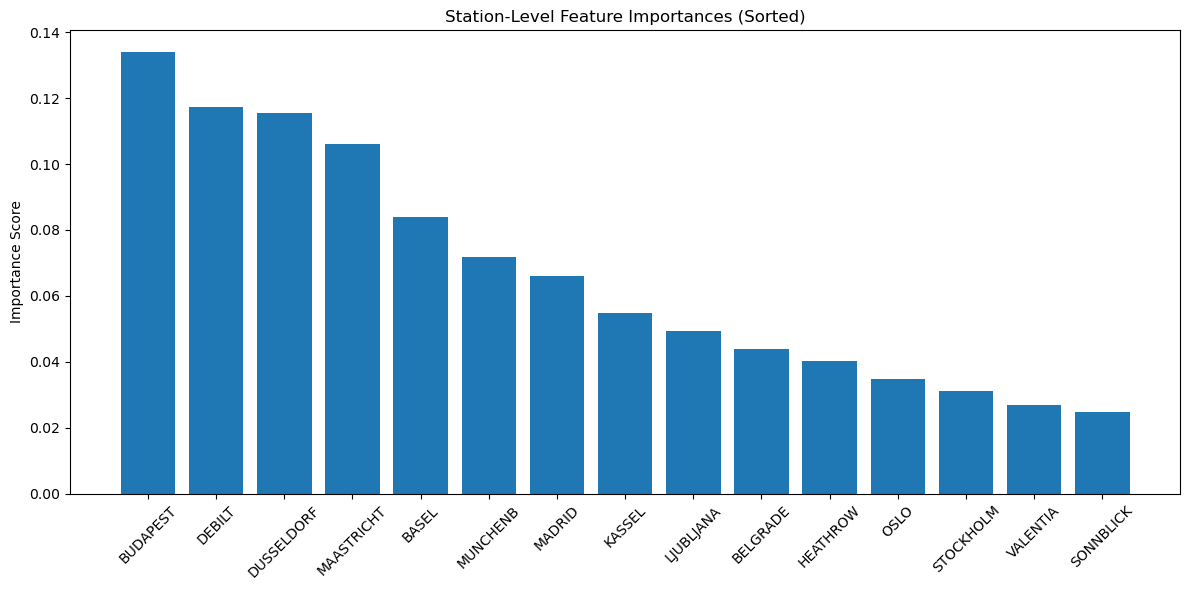

In [15]:
# Define station names manually
station_names = [
    "BASEL", "BELGRADE", "BUDAPEST", "DEBILT", "DUSSELDORF",
    "HEATHROW", "KASSEL", "LJUBLJANA", "MAASTRICHT", "MADRID",
    "MUNCHENB", "OSLO", "SONNBLICK", "STOCKHOLM", "VALENTIA"
]

# Reshape the flat feature importances into 15x9 (stations × features)
importances = clf.feature_importances_.reshape(15, 9)

# Sum over the 9 features to get total importance per station
station_importance = importances.sum(axis=1)

# Sort by importance
sorted_indices = np.argsort(station_importance)[::-1]  # descending
sorted_names = [station_names[i] for i in sorted_indices]
sorted_importance = station_importance[sorted_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_names, sorted_importance)
plt.title("Station-Level Feature Importances (Sorted)")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [18]:
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [19]:
# best results
best_params = random_search.best_params_

# narrow the grid:
refined_grid = {
    'n_estimators': [best_params['n_estimators'] - 50,
                     best_params['n_estimators'],
                     best_params['n_estimators'] + 50],
    'max_depth': [best_params['max_depth']],
    'max_features': [best_params['max_features']],
    'min_samples_split': [best_params['min_samples_split']],
    'min_samples_leaf': [best_params['min_samples_leaf']],
    'criterion': [best_params['criterion']]
}

# smaller grid
grid_all = GridSearchCV(
    rf,
    refined_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

In [20]:
clf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    criterion=best_params['criterion'],
    random_state=42
)

clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, max_features=None,
                       min_samples_split=10, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Predict on test set
y_pred = clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="micro")
rec = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print("Accuracy:", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall:", round(rec, 4))
print("F1 Score:", round(f1, 4))

Accuracy: 0.6457
Precision: 0.9133
Recall: 0.8959
F1 Score: 0.9045


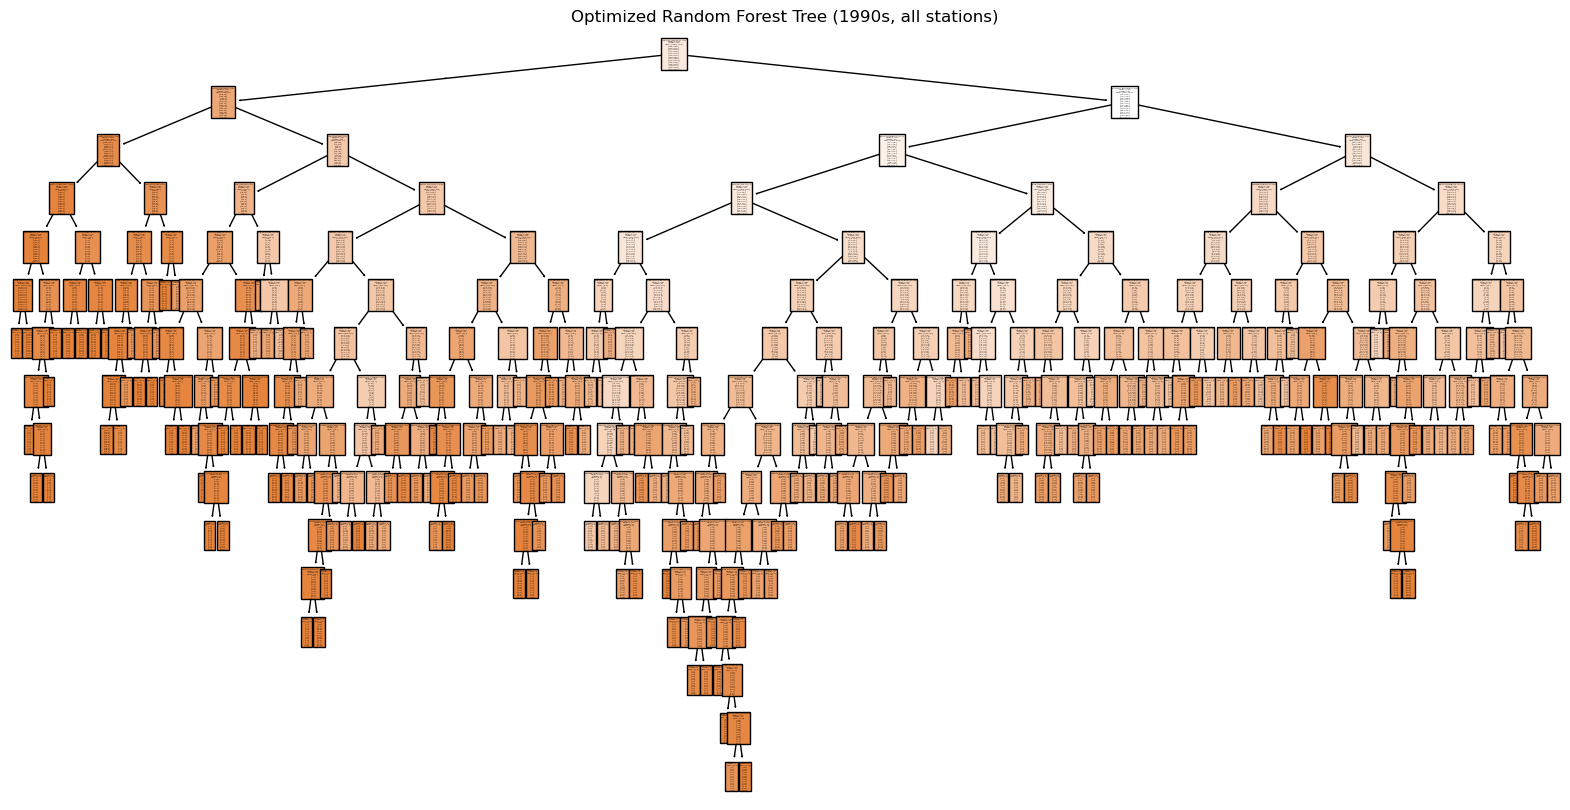

In [25]:
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], feature_names=weather_1990s.columns, filled=True)
plt.title("Optimized Random Forest Tree (1990s, all stations)")
plt.show()

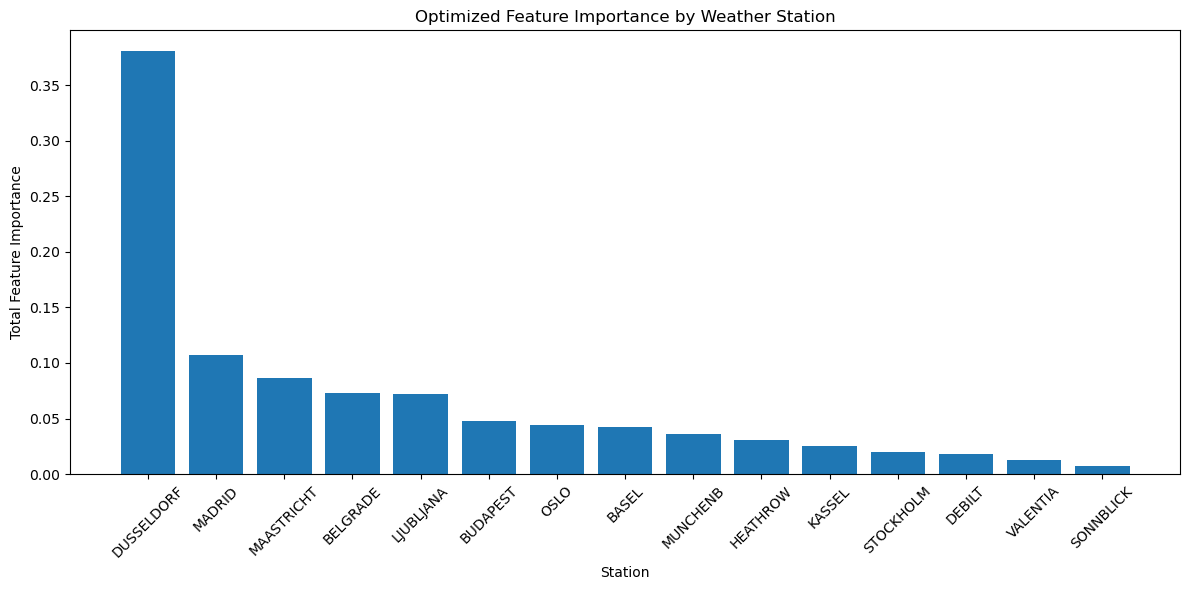

In [26]:
importances = clf.feature_importances_
assert importances.shape[0] == 135

# Sum feature importances per station
importances_reshaped = importances.reshape(15, 9)
station_importance = np.sum(importances_reshaped, axis=1)

# Define station names (must match your data’s station order)
station_names = [
    "BASEL", "BELGRADE", "BUDAPEST", "DEBILT", "DUSSELDORF",
    "HEATHROW", "KASSEL", "LJUBLJANA", "MAASTRICHT", "MADRID",
    "MUNCHENB", "OSLO", "SONNBLICK", "STOCKHOLM", "VALENTIA"
]

# Sort from greatest to least
sorted_indices = np.argsort(station_importance)[::-1]
station_names_sorted = [station_names[i] for i in sorted_indices]
importance_sorted = station_importance[sorted_indices]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(station_names_sorted, importance_sorted)
plt.title("Optimized Feature Importance by Weather Station")
plt.ylabel("Total Feature Importance")
plt.xlabel("Station")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For the random forest using all stations, the most important variables remained temp_max, precipitation, and sunshine. The optimized model provided clearer variable importance and more balanced precision, recall, and F1-scores compared to ones that weren't, addressing earlier concerns about misleadingly high accuracy. 

After optimization, my random forest model across all stations shifted from high accuracy (96.6%) with moderately strong precision and recall to a lower overall accuracy (64.6%) but with more balanced precision (91.3%), recall (89.6%), and F1-score (90.4%). This suggests that while the unoptimized model appeared highly accurate, it was likely overfitting or biased toward the dominant class. The optimized model, despite the lower accuracy, offers a more realistic and balanced prediction performance. 

In [27]:
station = "BUDAPEST"

# Extract station features
X = weather[[col for col in weather.columns if col.startswith(station)]]

# Extract target, convert to 0/1 and fill any missing with 0 (if needed)
y = answers[f"{station}_pleasant_weather"].fillna(0).astype(int).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="micro") 
rec = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print(f"{station} Accuracy: {accuracy:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

BUDAPEST Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [28]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [29]:
X_train.shape

(18360, 9)

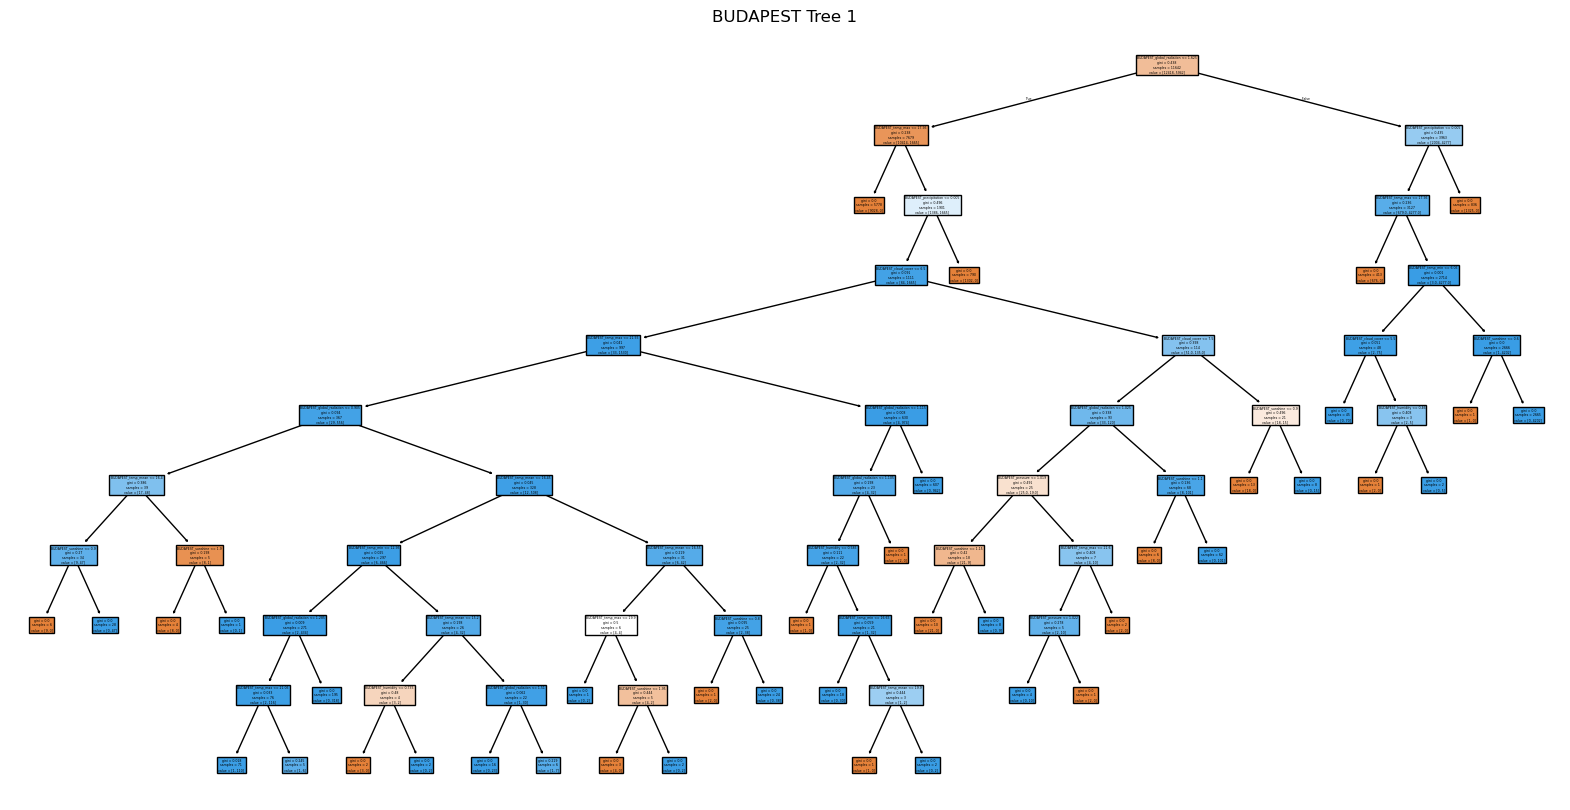

In [30]:
station_cols = [
    'BUDAPEST_cloud_cover',
    'BUDAPEST_humidity',
    'BUDAPEST_pressure',
    'BUDAPEST_global_radiation',
    'BUDAPEST_precipitation',
    'BUDAPEST_sunshine',
    'BUDAPEST_temp_mean',
    'BUDAPEST_temp_min',
    'BUDAPEST_temp_max'
]
# Plot decision tree from first estimator in the forest
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=station_cols, filled=True)
plt.title("BUDAPEST Tree 1")
plt.show()

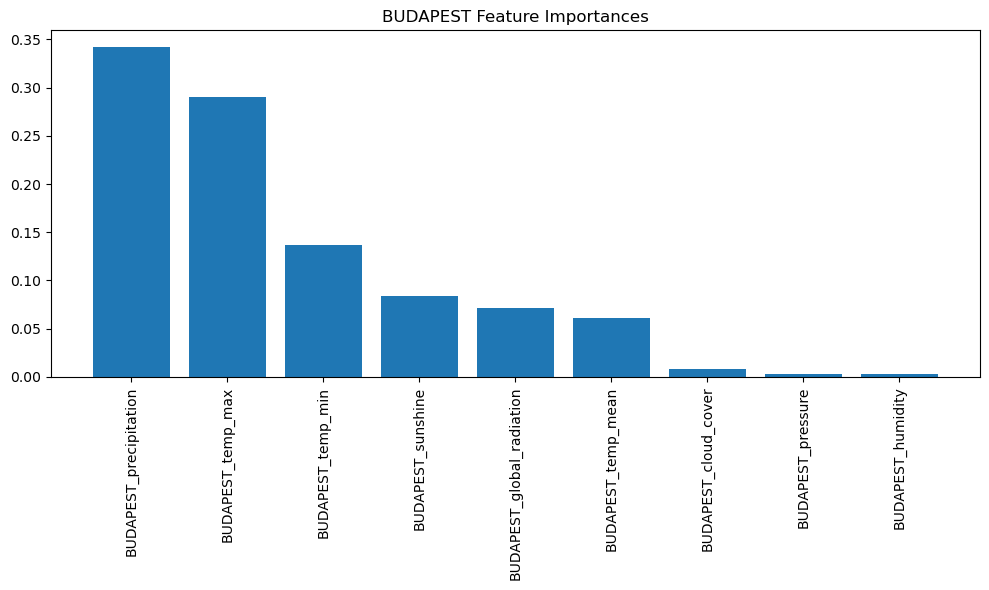

In [31]:
# Plot feature importances for BUDAPEST
# Get feature importances
importances_station = clf.feature_importances_

# Sort indices by importance (descending)
sorted_indices = np.argsort(importances_station)[::-1]

# Apply sorted order to names and importance values
sorted_names = [station_cols[i] for i in sorted_indices]
sorted_importance = importances_station[sorted_indices]

# Plot sorted feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_names, sorted_importance)
plt.xticks(rotation=90)
plt.title("BUDAPEST Feature Importances")
plt.tight_layout()
plt.show()

In [32]:
station = "DEBILT"

# Extract station features
X = weather[[col for col in weather.columns if col.startswith(station)]]

# Extract target, convert to 0/1 and fill any missing with 0 (if needed)
y = answers[f"{station}_pleasant_weather"].fillna(0).astype(int).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="micro")
rec = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print(f"{station} Accuracy: {accuracy:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

DEBILT Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


In [33]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

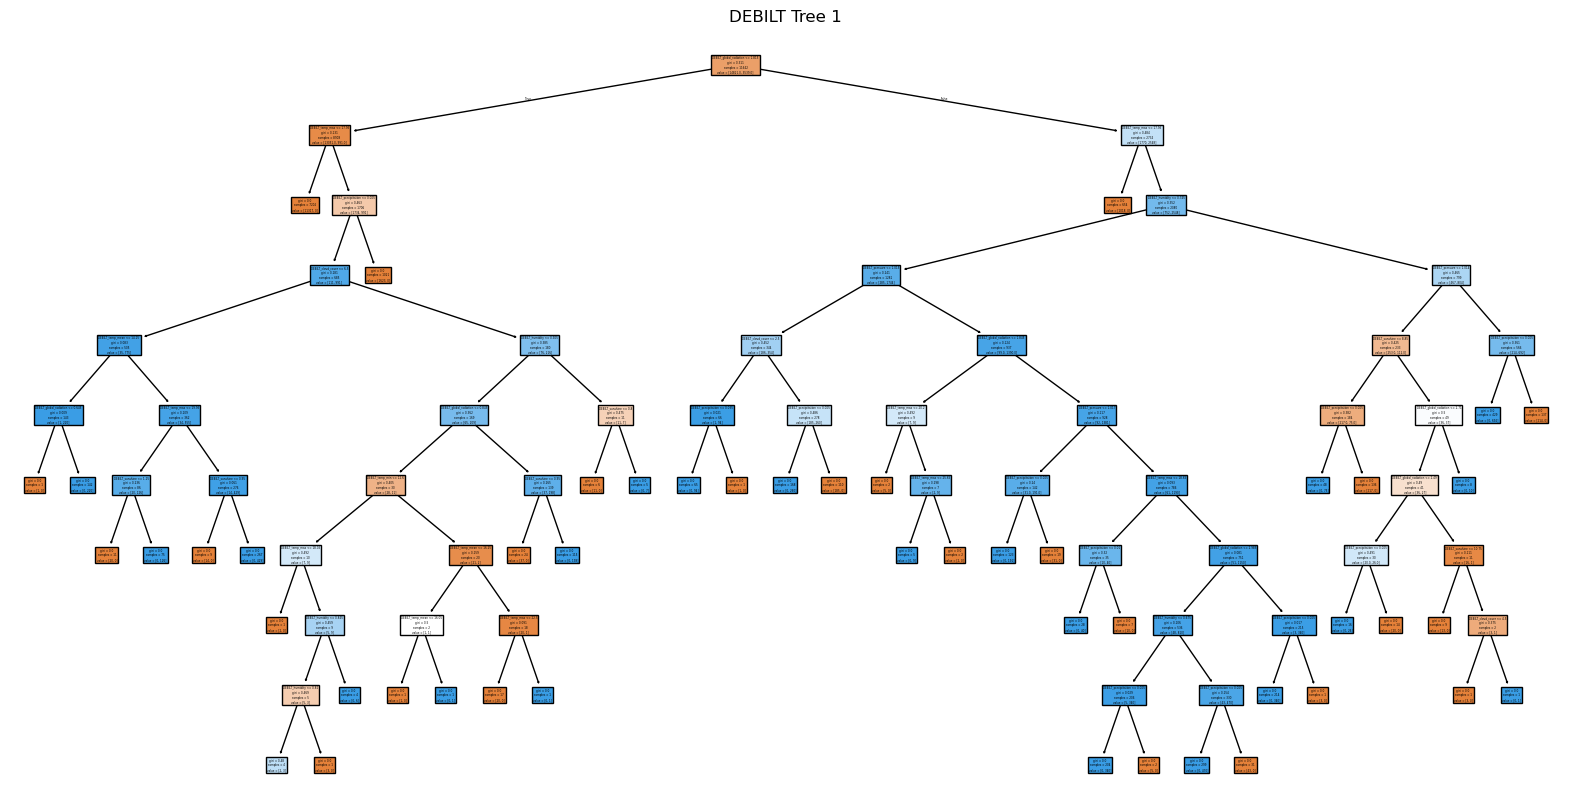

In [34]:
station_cols = [
    'DEBILT_cloud_cover',
    'DEBILT_humidity',
    'DEBILT_pressure',
    'DEBILT_global_radiation',
    'DEBILT_precipitation',
    'DEBILT_sunshine',
    'DEBILT_temp_mean',
    'DEBILT_temp_min',
    'DEBILT_temp_max'
]
# Plot decision tree from first estimator in the forest
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=station_cols, filled=True)
plt.title("DEBILT Tree 1")
plt.show()

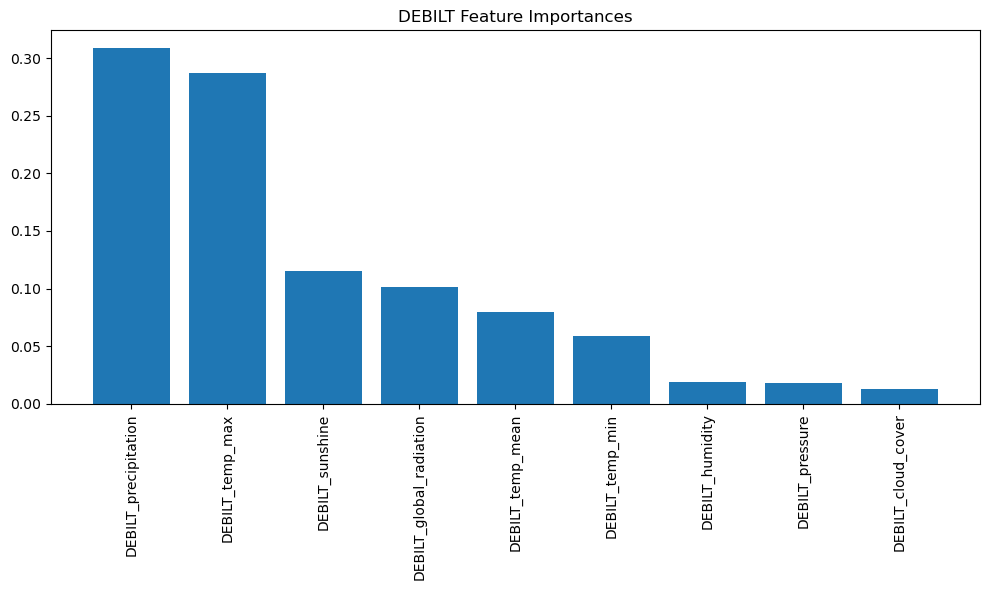

In [35]:
# Plot feature importances for DEBILT
importances_station = clf.feature_importances_

# Sort indices by importance (descending)
sorted_indices = np.argsort(importances_station)[::-1]

# Apply sorted order to feature names and importance values
sorted_names = [station_cols[i] for i in sorted_indices]
sorted_importance = importances_station[sorted_indices]

# Plot sorted feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_names, sorted_importance)
plt.xticks(rotation=90)
plt.title("DEBILT Feature Importances")
plt.tight_layout()
plt.show()

In [36]:
station = "DUSSELDORF"

# Extract station features
X = weather[[col for col in weather.columns if col.startswith(station)]]

# Extract target, convert to 0/1 and fill any missing with 0 (if needed)
y = answers[f"{station}_pleasant_weather"].fillna(0).astype(int).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
accuracy = clf.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average="micro")
rec = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")

print(f"{station} Accuracy: {accuracy:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

DUSSELDORF Accuracy: 1.0000
Precision: 0.8974
Recall: 0.8974
F1-score: 0.8974


In [37]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

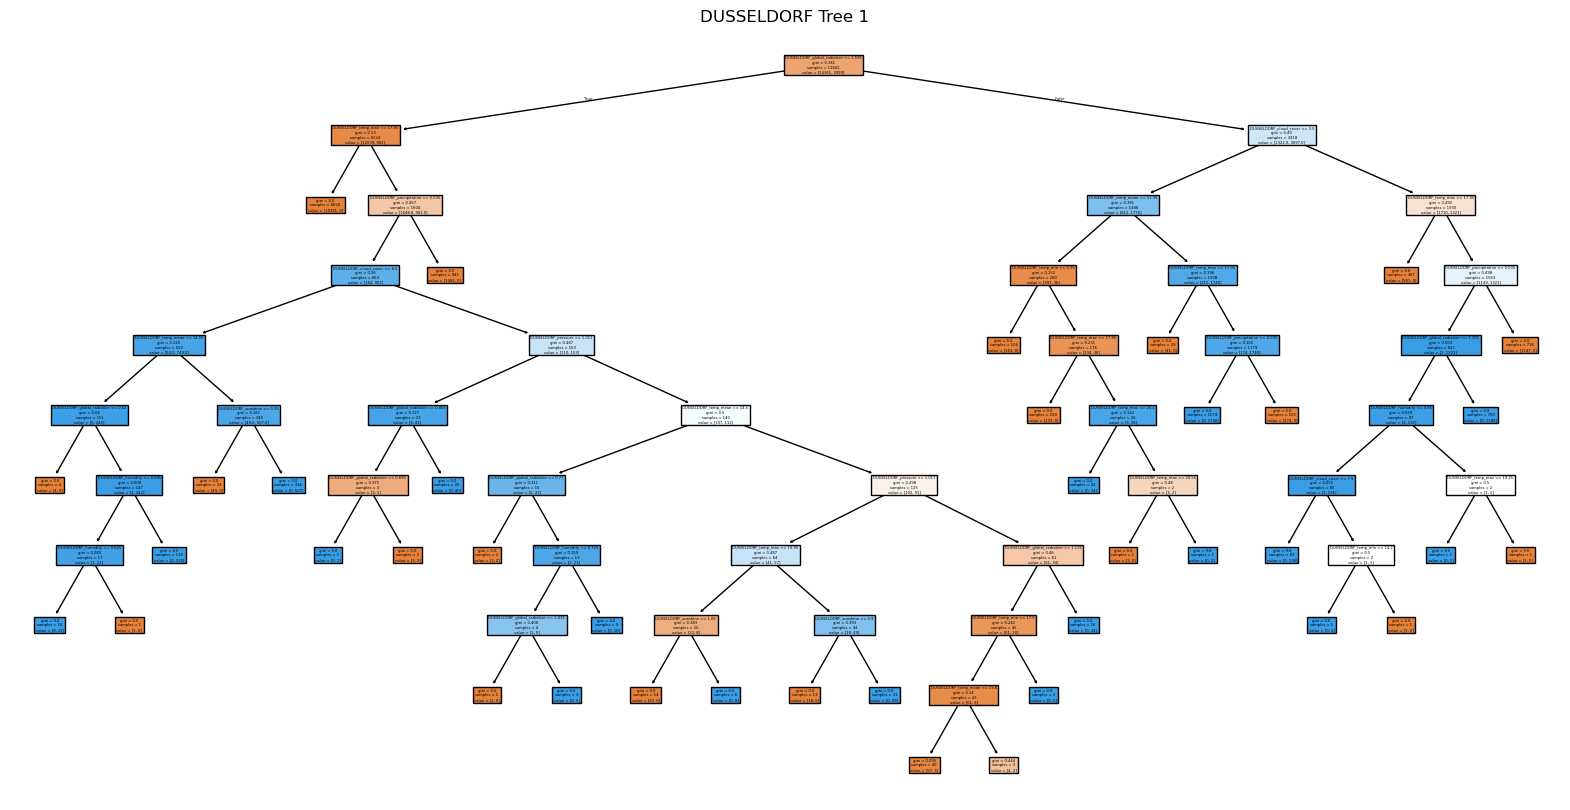

In [38]:
station_cols = [
    'DUSSELDORF_cloud_cover',
    'DUSSELDORF_humidity',
    'DUSSELDORF_pressure',
    'DUSSELDORF_global_radiation',
    'DUSSELDORF_precipitation',
    'DUSSELDORF_sunshine',
    'DUSSELDORF_temp_mean',
    'DUSSELDORF_temp_min',
    'DUSSELDORF_temp_max'
]
# Plot decision tree from first estimator in the forest
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=station_cols, filled=True)
plt.title("DUSSELDORF Tree 1")
plt.show()

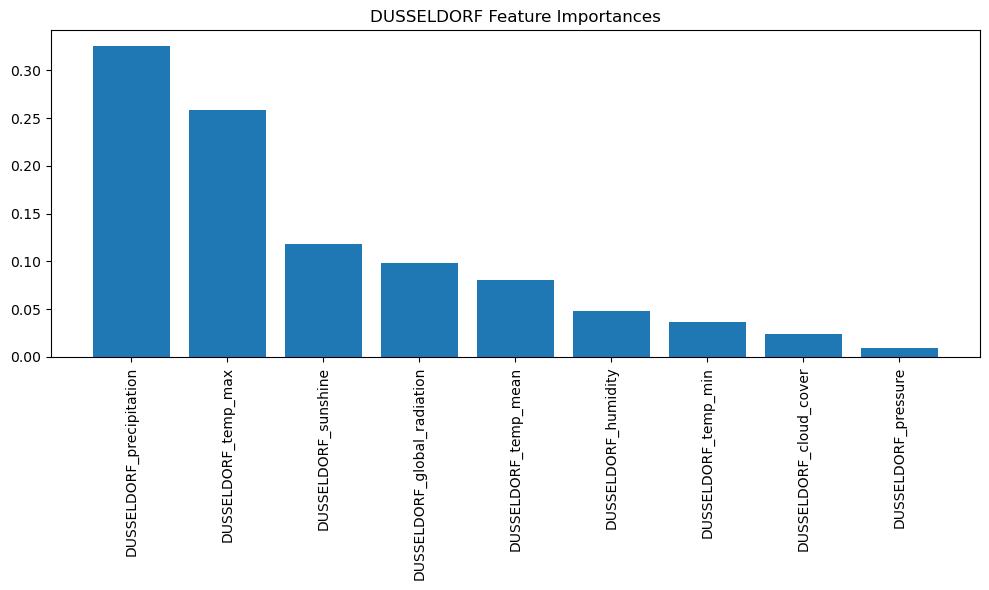

In [39]:
# Plot feature importances for DUSSELDORF
importances_station = clf.feature_importances_

# Sort indices by importance (descending)
sorted_indices = np.argsort(importances_station)[::-1]

# Apply sorted order to feature names and importance values
sorted_names = [station_cols[i] for i in sorted_indices]
sorted_importance = importances_station[sorted_indices]

# Plot sorted feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_names, sorted_importance)
plt.xticks(rotation=90)
plt.title("DUSSELDORF Feature Importances")
plt.tight_layout()
plt.show()

In [40]:
grid_all.fit(X_train, y_train)

print("Best Parameters (Single Station):", grid_all.best_params_)
print("Best Accuracy (Single Station):", grid_all.best_score_)

Best Parameters (Single Station): {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy (Single Station): 1.0


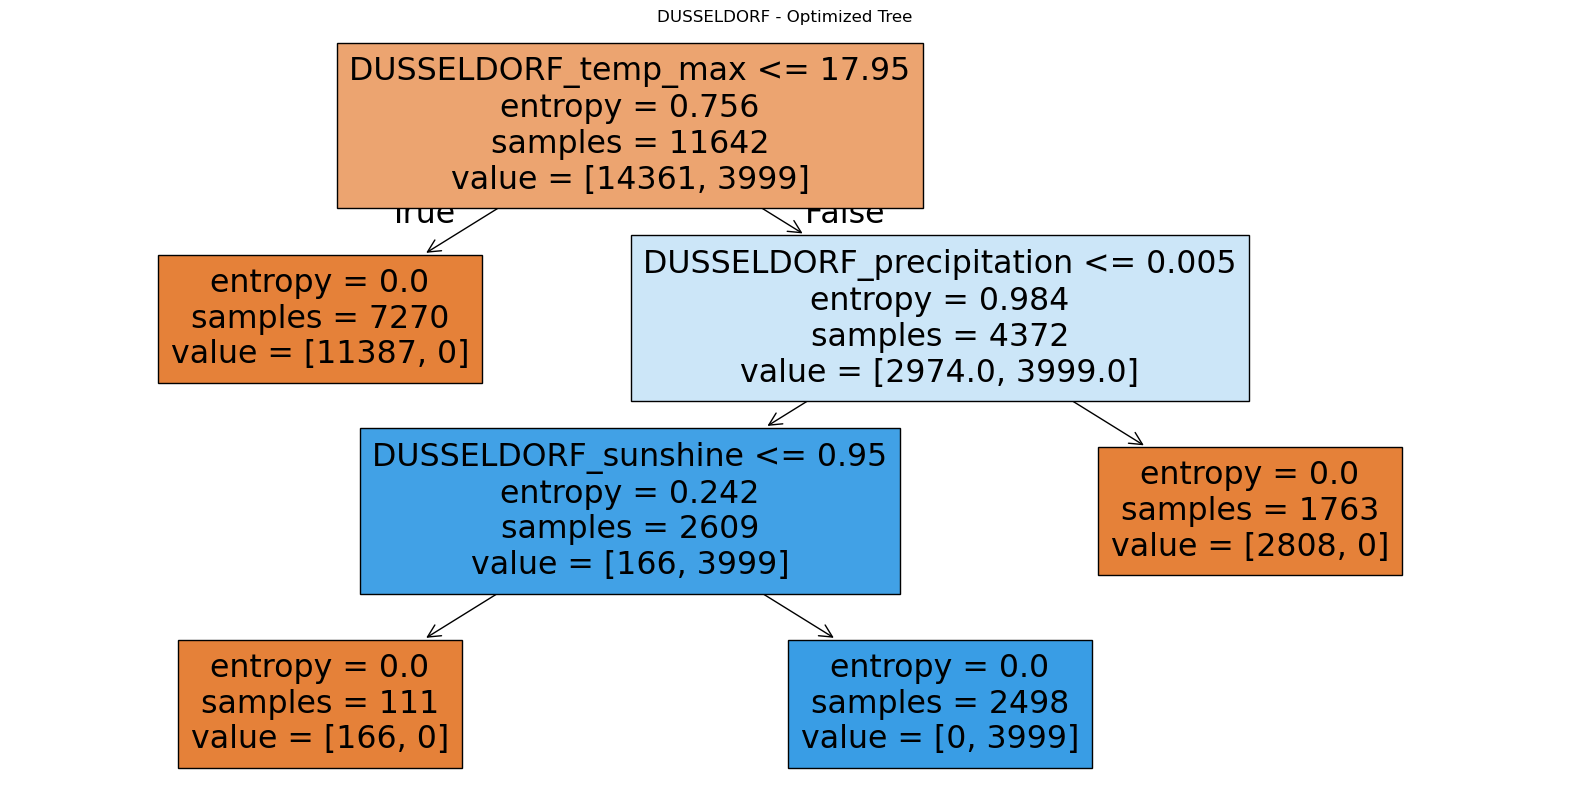

In [41]:
# Re-train with best parameters
best_station_model = grid_all.best_estimator_
best_station_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(best_station_model.estimators_[0], feature_names=station_cols, filled=True)
plt.title(f"{station} - Optimized Tree")
plt.savefig("Tree_DUSSELDORF_Optimized.png")
plt.show()

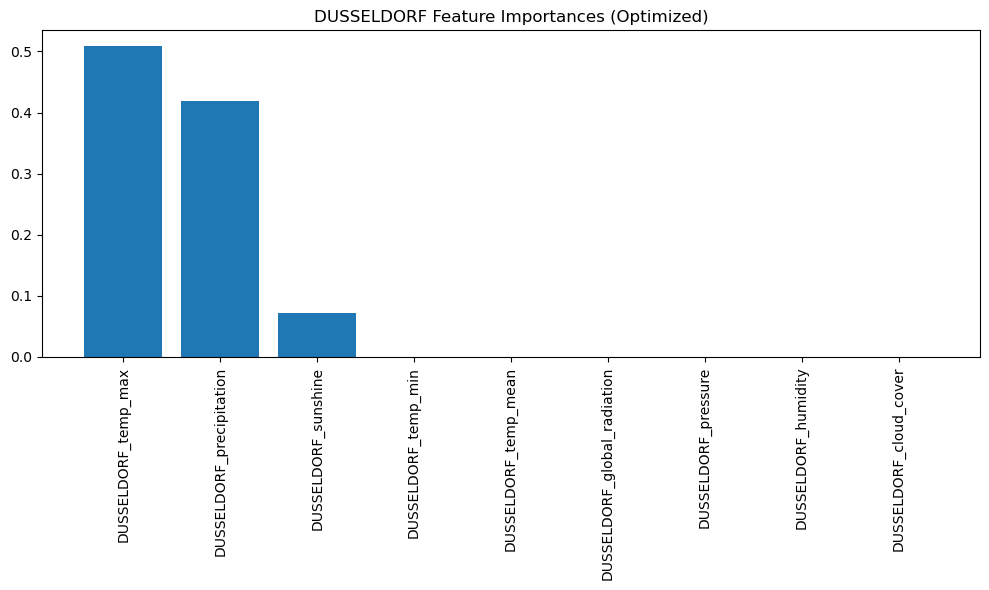

In [42]:
importances = best_station_model.feature_importances_

# Sort indices by importance (descending)
sorted_indices = np.argsort(importances)[::-1]

# Apply sorted order to feature names and importance values
sorted_names = [station_cols[i] for i in sorted_indices]
sorted_importance = importances[sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_names, sorted_importance)
plt.title(f"{station} Feature Importances (Optimized)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"FeatureImportance_DUSSELDORF.png")
plt.show()

In [45]:
y_pred = best_station_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


The single-station model (Dusseldorf) improved in performance and interpretability, with better-tuned tree depth and split settings. I recommend prioritizing sensors for temp_max, precipitation, and sunshine.